In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('train.csv')

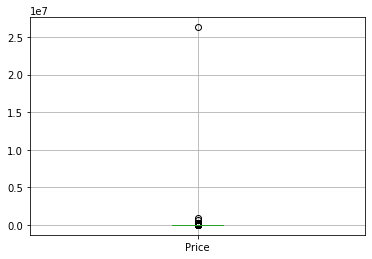

In [3]:
df.boxplot(column='Price')

In [4]:
ub=df.Price.mean()+3*df.Price.std()
lb=df.Price.mean()-3*df.Price.std()

In [5]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [6]:
r=df['Engine volume'].astype(str)
l=[]
for i in r:
    l.append(float(i[0:3]))

df['Engine volume']=l

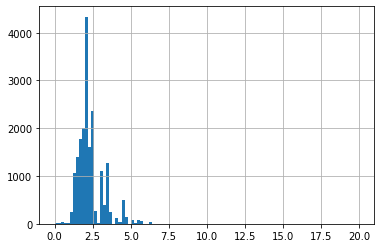

In [7]:
df['Engine volume'].hist(bins=100)

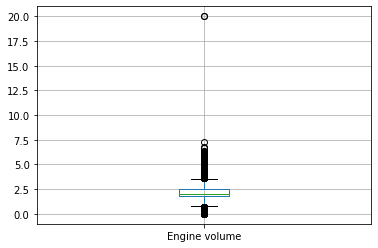

In [8]:
df.boxplot(column='Engine volume')

In [9]:
df['Engine volume'].describe()

count    19237.000000
mean         2.307990
std          0.877805
min          0.000000
25%          1.800000
50%          2.000000
75%          2.500000
max         20.000000
Name: Engine volume, dtype: float64

In [10]:
q1=df['Engine volume'].quantile(0.25)
q3=df['Engine volume'].quantile(0.75)
iqr=q3-q1

In [11]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [12]:
ub=df['Engine volume'].mean()+3*df['Engine volume'].std()
ub

4.941403336807516

In [13]:
lb=df['Engine volume'].mean()-3*df['Engine volume'].std()
lb

-0.325423714205209

In [14]:
df.loc[df['Engine volume']>=ul,'Engine volume']=df['Engine volume'].mean()

In [15]:
df.loc[df['Engine volume']<=ll,'Engine volume']=df['Engine volume'].mean()

In [16]:
df['Engine volume'].mean()

2.163229063206333

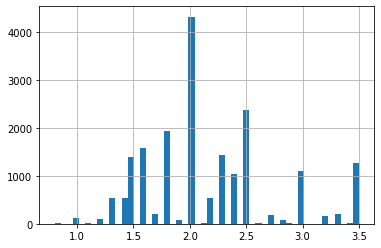

In [17]:
df['Engine volume'].hist(bins=50)

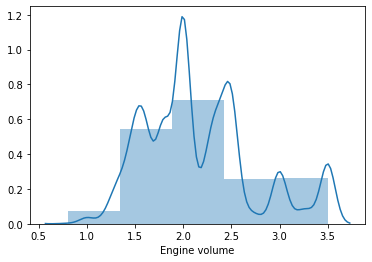

In [18]:
sns.distplot(df['Engine volume'],bins=5)

In [19]:
df['date']=2021

In [20]:
df['age']=df['date']-df['Prod. year']

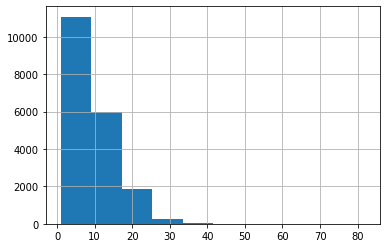

In [21]:
df.age.hist()

In [22]:
q1=df['age'].quantile(0.25)
q3=df['age'].quantile(0.75)
iqr=q3-q1

In [23]:
iqr

6.0

In [24]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [25]:
df.loc[df['age']>=ul,'age']=df.age.mean()

In [26]:
df.loc[df['age']<=ll,'age']=df.age.mean()

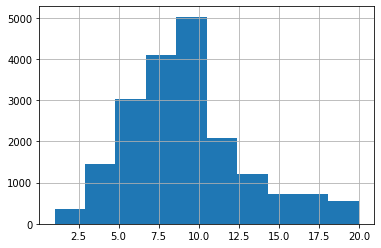

In [27]:
df.age.hist()

In [28]:
l=list(df.Airbags)

In [29]:
m=[]
for i in l:
    if i>=0 and i<=3:
        m.append(1)
    elif i>=4 and i<=7:
        m.append(2)
    elif i>=8 and i<=12:
        m.append(3)
    else:
        m.append(4)
    

In [30]:
df['Airbags_m']=m

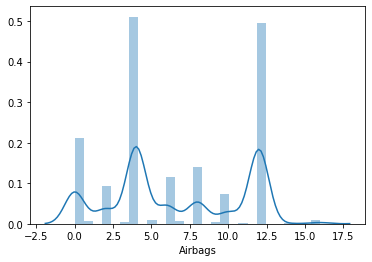

In [31]:
sns.distplot(df['Airbags'])

In [32]:
res=list(df.Mileage)
l=[]
for i in res:
    l.append(int(i[:-2]))
df['Mileage_l']=l

In [33]:
q1=df['Mileage_l'].quantile(0.25)
q3=df['Mileage_l'].quantile(0.75)
iqr=q3-q1

In [34]:
q1

70139.0

In [35]:
iqr

118749.0

In [36]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [37]:
df.Mileage_l.median()

126000.0

In [38]:
df.loc[df['Mileage_l']>=ul,'Mileage_l']=df.Mileage_l.median()

In [39]:
df.loc[df['Mileage_l']<=ll,'Mileage_l']=df.Mileage_l.median()

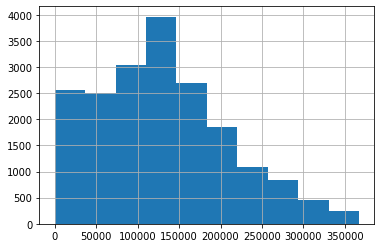

In [40]:
df.Mileage_l.hist()

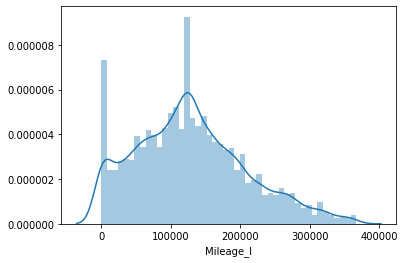

In [41]:
sns.distplot(df['Mileage_l'])

In [42]:
ub=df.Price.mean()+3*df.Price.std()
lb=df.Price.mean()-3*df.Price.std()

In [43]:
q1=df['Price'].quantile(0.25)
q3=df['Price'].quantile(0.75)
iqr=q3-q1

In [44]:
ul=q3+1.5*iqr
ll=q1-1.5*iqr

In [45]:
df.loc[df['Price']>=ul,'Price']=df.Price.mean()

In [46]:
df.loc[df['Price']<=ll,'Price']=df.Price.mean()

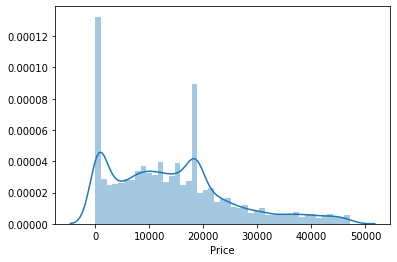

In [47]:
sns.distplot(df['Price'])

In [48]:
r=list(df.Levy)
l1=[]
for i in r:
    if i == '-':
        l1.append(0)
    else:
        l1.append(i)
        
df.Levy=l1
df.Levy=df.Levy.astype(float)

In [49]:
df.Levy.replace(0,df.Levy.median(),inplace=True)

In [50]:
q1=df['Levy'].quantile(0.25)
q3=df['Levy'].quantile(0.75)
iqr=q3-q1

In [51]:
iqr

275.0

In [52]:
ul=q3+1.5*iqr
ll=q1-2*iqr
ll

92.0

In [53]:
df.loc[df['Levy']>=ul,'Levy']=ul

In [54]:
df.loc[df['Levy']>=ul,'Levy']=ll

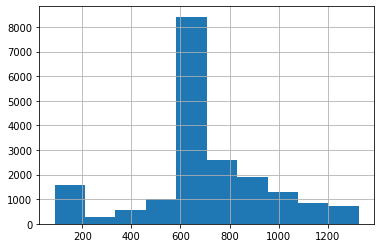

In [55]:
df.Levy.hist(bins=10)

In [56]:
df.Levy.value_counts()

642.0     6084
92.0      1575
765.0      486
891.0      461
639.0      410
640.0      405
1017.0     298
781.0      297
707.0      270
836.0      260
779.0      252
777.0      246
585.0      214
831.0      208
1172.0     197
586.0      189
761.0      183
1091.0     170
730.0      170
645.0      161
531.0      159
394.0      156
1058.0     150
919.0      141
583.0      139
1018.0     135
862.0      129
753.0      128
1053.0     128
584.0      126
          ... 
841.0        1
556.0        1
864.0        1
623.0        1
1252.0       1
1118.0       1
1045.0       1
524.0        1
1171.0       1
1297.0       1
1323.0       1
967.0        1
695.0        1
741.0        1
644.0        1
676.0        1
873.0        1
683.0        1
972.0        1
714.0        1
173.0        1
604.0        1
681.0        1
916.0        1
997.0        1
668.0        1
461.0        1
1064.0       1
1103.0       1
682.0        1
Name: Levy, Length: 307, dtype: int64

In [57]:
df['Prep']=df['Price']+df['Levy']

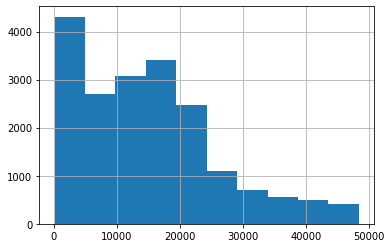

In [58]:
df.Prep.hist()

In [59]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Drive wheels,Doors,Wheel,Color,Airbags,date,age,Airbags_m,Mileage_l,Prep
0,45654403,13328.0,92.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,4x4,04-May,Left wheel,Silver,12,2021,11.0,3,186005.0,13420.0
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,...,4x4,04-May,Left wheel,Black,8,2021,10.0,3,192000.0,17639.0
2,45774419,8467.0,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,Front,04-May,Right-hand drive,Black,2,2021,15.0,1,200000.0,9109.0
3,45769185,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,4x4,04-May,Left wheel,White,0,2021,10.0,1,168966.0,4469.0
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,Front,04-May,Left wheel,Silver,4,2021,7.0,2,91901.0,12172.0


In [60]:
df['Manufacturer'] = df['Manufacturer'].str.replace('სხვა','OTHER MANUFACTURER')

In [64]:
df['Engine volume']=df['Engine volume'].round(1)

In [70]:
def door_changer(door_data):
    if 'may' in door_data.lower():
        door_data_ = door_data.lower() \
                     .replace('may','05') \
                     .replace('0','')
        return door_data_
    
    elif 'mar' in door_data.lower():
        door_data_ = door_data.lower() \
                     .replace('mar','03') \
                     .replace('0','')
        return door_data_
    
    else:
        return door_data
     
df['Door1'] = df['Doors'].apply(door_changer,1)

In [72]:
df['Door1'] =df['Door1'].map({'2-3':1,'4-5':2,'>5':3})

In [73]:
df.Door1.value_counts()

2    18332
1      777
3      128
Name: Door1, dtype: int64

In [78]:
import regex
def english_words_keeper(model_data):
    md_ = regex.sub('[^a-zA-Z0-9]',' ',model_data)
    return md_

df['Model1'] = df['Model'].apply(english_words_keeper,1)

In [83]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,...,Wheel,Color,Airbags,date,age,Airbags_m,Mileage_l,Prep,Door1,Model1
0,45654403,13328.0,92.0,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,...,Left wheel,Silver,12,2021,11.0,3,186005.0,13420.0,2,RX 450
1,44731507,16621.0,1018.0,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3.0,...,Left wheel,Black,8,2021,10.0,3,192000.0,17639.0,2,Equinox
2,45774419,8467.0,642.0,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,...,Right-hand drive,Black,2,2021,15.0,1,200000.0,9109.0,2,FIT
3,45769185,3607.0,862.0,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,...,Left wheel,White,0,2021,10.0,1,168966.0,4469.0,2,Escape
4,45809263,11726.0,446.0,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,...,Left wheel,Silver,4,2021,7.0,2,91901.0,12172.0,2,FIT


In [84]:
df.drop(columns=['ID','Model','Prod. year','date','Airbags','Doors'],inplace=True)

In [85]:
df.head()

,Price,Levy,Manufacturer,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Wheel,Color,age,Airbags_m,Mileage_l,Prep,Door1,Model1
0,13328.0,92.0,LEXUS,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,Left wheel,Silver,11.0,3,186005.0,13420.0,2,RX 450
1,16621.0,1018.0,CHEVROLET,Jeep,No,Petrol,3.0,192000 km,6.0,Tiptronic,4x4,Left wheel,Black,10.0,3,192000.0,17639.0,2,Equinox
2,8467.0,642.0,HONDA,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,Right-hand drive,Black,15.0,1,200000.0,9109.0,2,FIT
3,3607.0,862.0,FORD,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,Left wheel,White,10.0,1,168966.0,4469.0,2,Escape
4,11726.0,446.0,HONDA,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,Left wheel,Silver,7.0,2,91901.0,12172.0,2,FIT


In [87]:
df.drop(columns=['Mileage'],inplace=True)

In [88]:
df.columns

Index(['Price', 'Levy', 'Manufacturer', 'Category', 'Leather interior',
       'Fuel type', 'Engine volume', 'Cylinders', 'Gear box type',
       'Drive wheels', 'Wheel', 'Color', 'age', 'Airbags_m', 'Mileage_l',
       'Prep', 'Door1', 'Model1'],
      dtype='object')

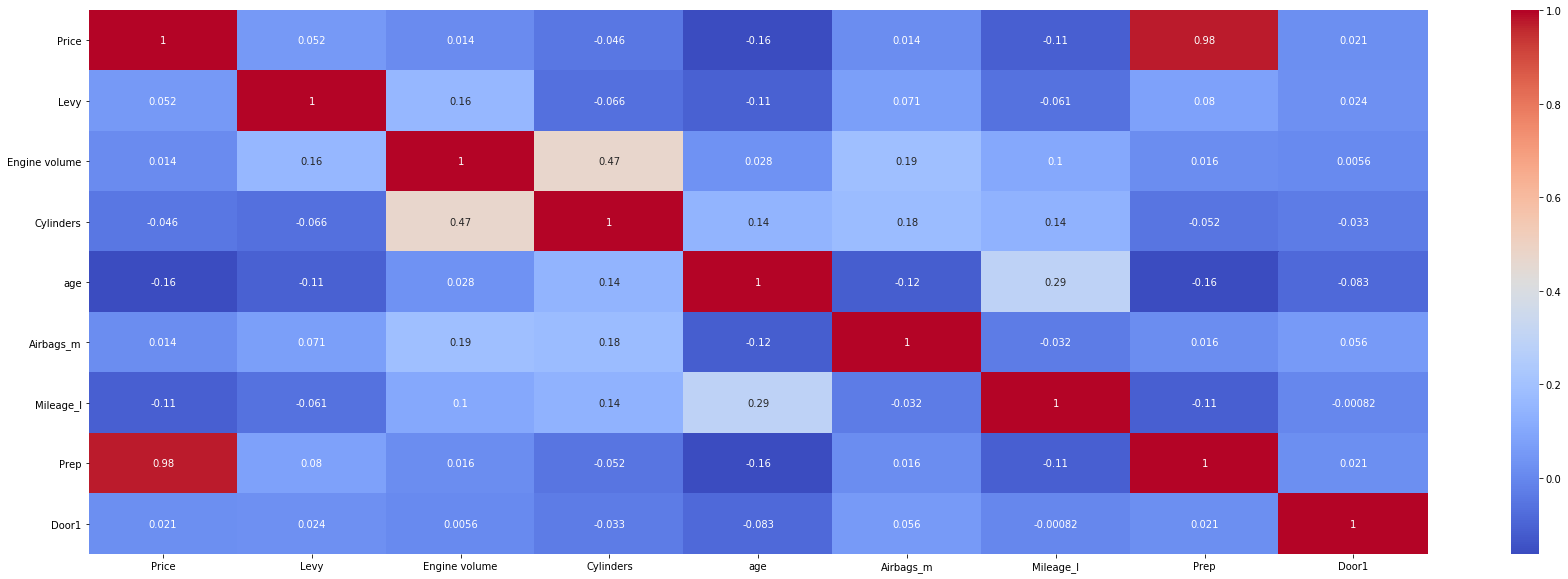

In [90]:
plt.figure(figsize = (30,10))
sns.heatmap(df.corr(method='kendall'),cmap='coolwarm',annot=True)

In [92]:
from scipy.stats import chi2_contingency
cars_cat_df = df.select_dtypes(include='object')
def cramers_V(var1,var2) :
    crosstab =np.array(pd.crosstab(var1,var2, rownames=None, colnames=None)) # Cross table building
    stat = chi2_contingency(crosstab)[0] # Keeping of the test statistic of the Chi2 test
    obs = np.sum(crosstab) # Number of observations
    mini = min(crosstab.shape)-1 # Take the minimum value between the columns and the rows of the cross table
    return np.sqrt((stat/(obs*mini)))
rows= []

for var1 in cars_cat_df:
    col = []
    for var2 in cars_cat_df :
        cramers = cramers_V(cars_cat_df[var1], cars_cat_df[var2]) # Cramer's V test
        col.append(cramers) 
    rows.append(col)

cramers_results = np.array(rows)
    
df_categorical_corr_vars = pd.DataFrame(cramers_results, columns = cars_cat_df.columns, index =cars_cat_df.columns)

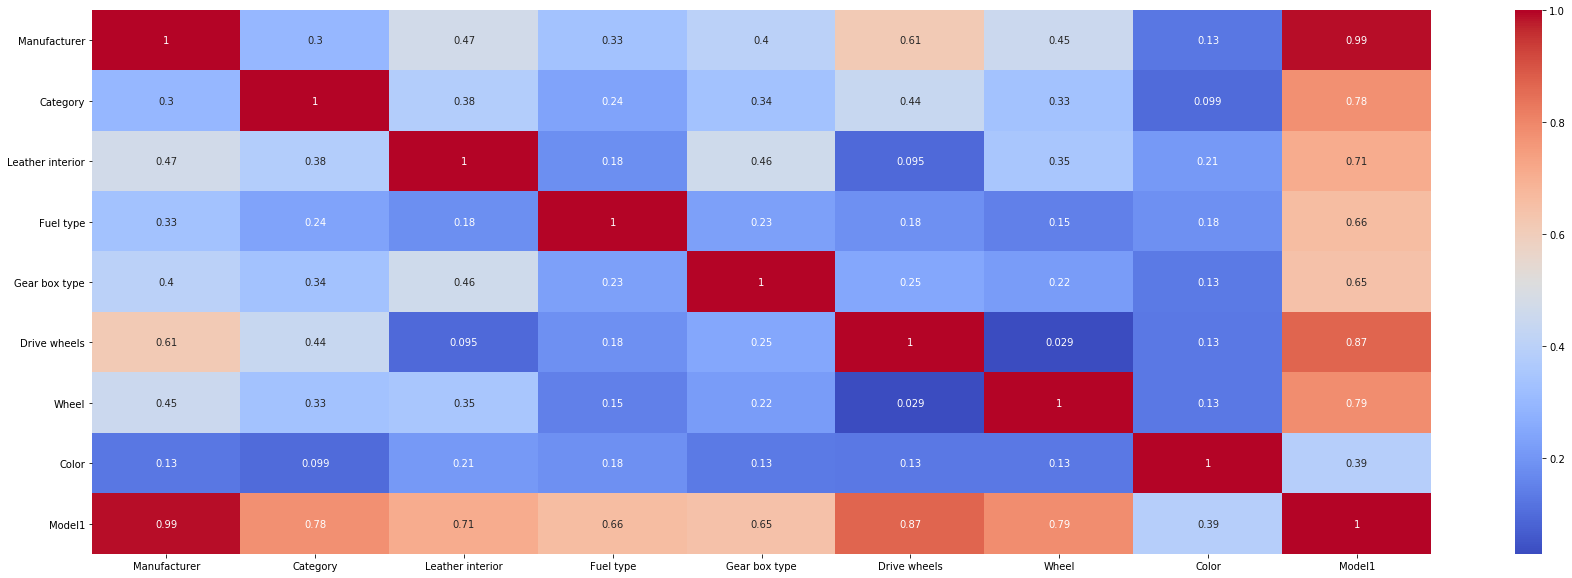

In [94]:
plt.figure(figsize = (30,10))
sns.heatmap(df_categorical_corr_vars,annot=True,cmap='coolwarm')

In [95]:
df.drop(columns=['Model1'],inplace=True)

In [97]:
df.drop(columns=['Price'],inplace=True)

In [98]:
def data_encoder(df):
    
    cat_cols = df.select_dtypes(include='object').columns.tolist() # categorical
    conti_cols = df.select_dtypes(exclude='object').columns.tolist() # continous
    
    encoded_df=  \
                pd.concat(
                            [
                            pd.DataFrame(   #df1
                            OrdinalEncoder()
                           .fit_transform(df[cat_cols]),
                            columns=cat_cols),
                            df[conti_cols] # df2
                            ],
                            axis=1
                        )   \
                        .reset_index(drop=True)
    return encoded_df

def data_scaler(df):
    scaled_df = pd.DataFrame(
                             MinMaxScaler()  \
                            .fit_transform(df),
                            columns=df.columns
                            )
    return scaled_df

In [115]:
from sklearn.preprocessing import StandardScaler,MinMaxScaler,RobustScaler,MaxAbsScaler,QuantileTransformer,PowerTransformer
from sklearn.preprocessing import LabelEncoder,OrdinalEncoder
input_df = df.drop(columns=['Prep'])
y= np.log(df['Prep'])
X = data_scaler(data_encoder(input_df))
X.head(1)

,Manufacturer,Category,Leather interior,Fuel type,Gear box type,Drive wheels,Wheel,Color,Levy,Engine volume,Cylinders,age,Airbags_m,Mileage_l,Door1
0,0.5,0.4,1.0,0.333333,0.0,0.0,0.0,0.8,0.004032,1.0,0.333333,0.526316,0.666667,0.506826,0.5


In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X, y, test_size=0.3)

In [119]:
from sklearn.ensemble import RandomForestRegressor

In [120]:
clf=RandomForestRegressor(n_estimators=100)

In [121]:
clf.fit(X_train,y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=100,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [122]:
y_pred=clf.predict(X_test)
y_pred

array([ 7.5889661 ,  8.11839167,  8.46895714, ...,  9.01471018,
        7.03790596, 10.11951703])

In [123]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

In [124]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}
grid_search = GridSearchCV(estimator = clf, param_grid = param_grid,cv = 5, n_jobs = -1, verbose = 5)
grid_search.fit(X_train,y_train)
grid_search.best_params_
best_grid = grid_search.best_estimator_

Fitting 5 folds for each of 288 candidates, totalling 1440 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    4.9s
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:   37.0s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 272 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  5.9min
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  8.7min
[Parallel(n_jobs=-1)]: Done 866 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 1136 tasks      | elapsed: 15.8min
[Parallel(n_jobs=-1)]: Done 1440 out of 1440 | elapsed: 20.4min finished


In [125]:
y_pred=grid_search.predict(X_test)

In [126]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 200}

In [127]:
best_grid = grid_search.best_estimator_

In [128]:
import numpy as np
from sklearn import metrics

print('Mean Absolute Error (MAE):', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error (MSE):', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error (RMSE):', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
mape = np.mean(np.abs((y_test - y_pred) / np.abs(y_test)))
print('Mean Absolute Percentage Error (MAPE):', round(mape * 100, 2))
print('Accuracy:', round(100*(1 - mape), 2))

Mean Absolute Error (MAE): 0.4446186670307756
Mean Squared Error (MSE): 0.4418337523522853
Root Mean Squared Error (RMSE): 0.6647057637423384
Mean Absolute Percentage Error (MAPE): 5.28
Accuracy: 94.72


In [133]:
import pickle
pickle.dump(grid_search, open('CarPred_model.sav', 'wb'))

In [147]:
df2=y_pred

In [148]:
data=pd.DataFrame(data=df2,columns=["Price"])

In [149]:
data.to_csv('sub.csv',index=False)